<a href="https://colab.research.google.com/github/angelociaramella/neptunia/blob/main/PCA_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Hebbian learning - Principal Component Analysis (PCA)

import numpy as np
import scipy as sc
from scipy.spatial import distance



class PCA_NN:
  def __init__(self, x, n):
    self.n_input =  x.shape[1]
    self.n_output =  n
    self.W =  (np.random.rand(self.n_input, self.n_output) - 0.5) * 2
    self.W = self.W /sc.linalg.norm(self.W)

  def fit_Oja(self, x, lr, epsilon, max_epoch):

    N_pattern = x.shape[0]

    error = 1.0;
    epochs = 0;

    W = self.W;

    I = np.identity(self.n_output)

    while (error > epsilon) and (epochs < max_epoch):
      for k in range(N_pattern):
        y = (self.W @ x[k,:].T)
        #self.W = self.W + lr * (I - self.W * self.W.T) * x[k,:] * x[k,:].T * self.W
        #self.W = self.W /sc.linalg.norm(self.W)

        for j in range(self.n_output):
          for i in range(self.n_input):
             self.W[i, j] =  self.W[i, j] + lr * y[j] * (x[k,i] - (self.W[:,j].T @  y))


      #self.W = self.W /sc.linalg.norm(self.W)
      #self.W = self.W * self.W.T ** (-.5) * self.W

      epochs += 1
      error = distance.euclidean(W.flatten(), self.W.flatten())
      W = self.W;

      print("Epoch:", epochs, " error: ", error)


  def fit_Sanger(self, x, lr, epsilon, max_epoch):
    N_pattern = x.shape[0]
    error = 1.0;
    epochs = 0;

    W = self.W;

    while (error > epsilon) and (epochs < max_epoch):
      for k in range(N_pattern):
        self.W = self.W + lr * (x[k,:] * x[k,:].T * self.W - self.W * np.triu(x[k,:].T * self.W * x[k,:].T * self.W))

      self.W = self.W /sc.linalg.norm(self.W)

      epochs += 1
      error = distance.euclidean(W.flatten(), self.W.flatten())
      W = self.W;

      print("Epoch:", epochs, " error: ", error)


  def W(self):
    return self.W


  def pred(self, x):
    return self.W @ x.T

<ipython-input-38-62fec9e4f6b2>:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x = np.random.multivariate_normal([0, 0], [[0.5, 0.8],[0.1, .1]], 1000)


Epoch: 1  error:  0.11249832334949483
Epoch: 2  error:  0.07594859905678601
Epoch: 3  error:  0.05332449543867919
Epoch: 4  error:  0.0390952008430969
Epoch: 5  error:  0.029736793111883365
Epoch: 6  error:  0.023298683210480068
Epoch: 7  error:  0.01869515447315141
Epoch: 8  error:  0.015297754731041951
Epoch: 9  error:  0.012725692469876357
Epoch: 10  error:  0.010737978729326263
Epoch: 11  error:  0.009176072075164667
Epoch: 12  error:  0.007932067036288255
Epoch: 13  error:  0.006930292902389024
Epoch: 14  error:  0.006116254925472787
Epoch: 15  error:  0.005449762251674424
Epoch: 16  error:  0.004900533242238998
Epoch: 17  error:  0.00444531559019488
Epoch: 18  error:  0.004065959064444679
Epoch: 19  error:  0.0037481011781779505
Epoch: 20  error:  0.003480254023941709
Epoch: 21  error:  0.0032531568165092618
Epoch: 22  error:  0.0030593059574103684
Epoch: 23  error:  0.0028926047940402064
Epoch: 24  error:  0.0027480952460473746
Epoch: 25  error:  0.002621746755095753
Epoch: 26  

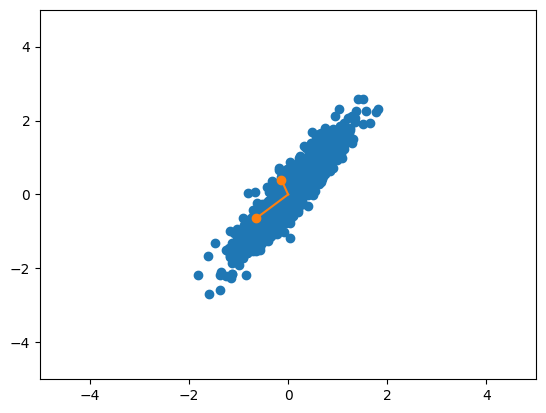

[[-0.13618053 -0.64013082]
 [ 0.40239275 -0.64013082]]


In [38]:
import numpy as np
import matplotlib as plt

x = np.random.multivariate_normal([0, 0], [[0.5, 0.8],[0.1, .1]], 1000)


#x = 0.1 * np.random.randn(100, 100);

net = PCA_NN(x, 2)

#net.fit_Oja(x, 0.001, 0.001, 100)
net.fit_Sanger(x, 0.001, 0.001, 100)

plt.pyplot.scatter(x[:,0], x[:,1])

plt.pyplot.plot([0, net.W[0,1]], [0, net.W[1,1]], c='tab:orange')

plt.pyplot.scatter(net.W[0,1], net.W[1,1], c='tab:orange')

plt.pyplot.plot([0, net.W[0,0]], [0, net.W[1,0]], c='tab:orange')

plt.pyplot.scatter(net.W[0,0], net.W[1,0], c='tab:orange')

plt.pyplot.xlim([-5, 5])
plt.pyplot.ylim([-5, 5])


plt.pyplot.show()

print(net.W)

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x)




[0.63199137 0.36800863]
